<a href="https://colab.research.google.com/github/CodeHunterOfficial/DL-for-beginers/blob/main/%D0%9A%D0%A0_%D0%90%D1%80%D0%B0%D0%B1%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

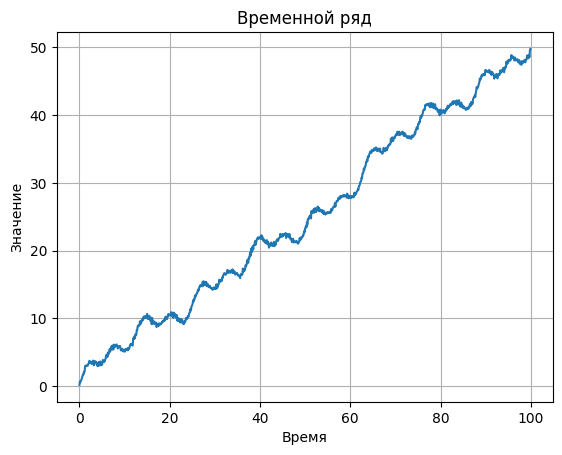

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Создание временного ряда
t = np.arange(0, 100, 0.1)
y = np.sin(t) + 0.5 * t + np.random.normal(0, 0.2, len(t))

# Добавление сезонности
season = np.sin(t/10) + np.sin(t/5) + np.sin(t/2)
y += season

# Построение графика временного ряда
plt.plot(t, y)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Временной ряд')
plt.grid(True)
plt.show()

# Разделение на обучающую и тестовую выборки
train_size = int(len(y) * 0.8)
train_data, test_data = y[:train_size], y[train_size:]

# Создание окон для обучения и тестирования
window_size = 10

def create_dataset(data):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Сохранение наборов обучающих и тестовых данных
np.save('train_data.npy', train_data)
np.save('test_data.npy', test_data)


Epoch 1/50
50/50 [==============================] - 3s 7ms/step - loss: 151.8640
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 0.5922
Epoch 3/50
50/50 [==============================] - 0s 7ms/step - loss: 0.2595
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.2626
Epoch 5/50
50/50 [==============================] - 0s 7ms/step - loss: 0.2617
Epoch 6/50
50/50 [==============================] - 0s 8ms/step - loss: 0.2636
Epoch 7/50
50/50 [==============================] - 0s 6ms/step - loss: 0.2612
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 9/50
50/50 [==============================] - 0s 6ms/step - loss: 0.2648
Epoch 10/50
50/50 [==============================] - 0s 5ms/step - loss: 0.2632
Epoch 11/50
50/50 [==============================] - 0s 5ms/step - loss: 0.2603
Epoch 12/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2736
Epoch 13/50
50/50 [============================

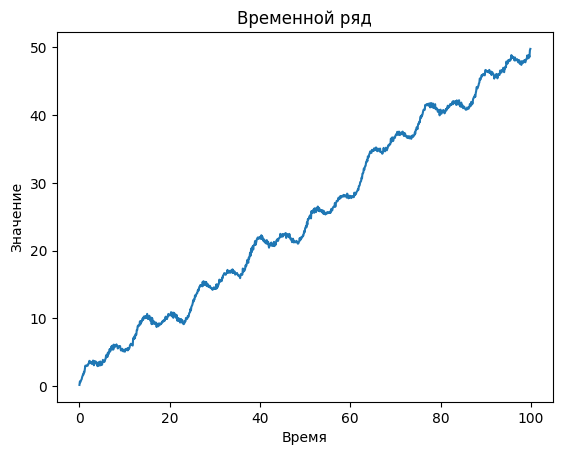

6/6 [==============================] - 0s 2ms/step


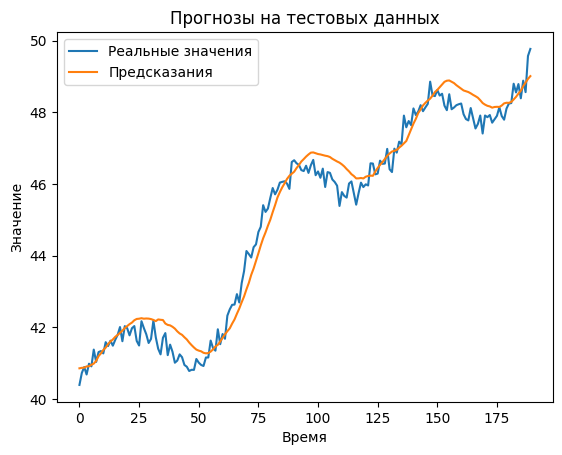

25/25 [==============================] - 0s 2ms/step


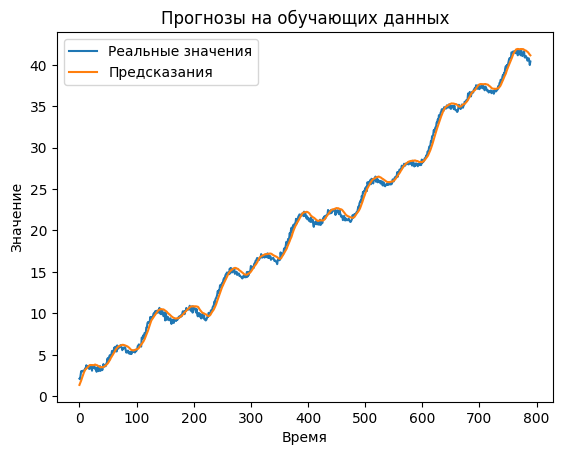

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Загрузка обучающего и тестового датасетов
train_data = np.load('train_data.npy')
test_data = np.load('test_data.npy')

# Решейпинг данных
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Создание модели
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(window_size, 1)),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Обучение модели
model.fit(X_train, y_train, epochs=50, batch_size=16)

# Сохранение весов модели
model.save_weights('model_weights.h5')

# Оценка модели на тестовых данных
loss = model.evaluate(X_test, y_test)
print("Потеря на тестовых данных:", loss)

# Прогнозы на тестовых данных
y_pred = model.predict(X_test)

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred)

# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)

# Вычисление MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Вычисление RMSE
rmse = np.sqrt(mse)

# Вывод результатов
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)
print("RMSE:", rmse)

# Построение графика временного ряда
plt.plot(t, y)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Временной ряд')
plt.show()

# Построение графика реальных значений и предсказаний на тестовых данных
y_test_pred = model.predict(X_test)
plt.plot(y_test, label='Реальные значения')
plt.plot(y_test_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на тестовых данных')
plt.show()

# Построение графика реальных значений и предсказаний на обучающих данных
y_train_pred = model.predict(X_train)
plt.plot(y_train, label='Реальные значения')
plt.plot(y_train_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на обучающих данных')
plt.show()

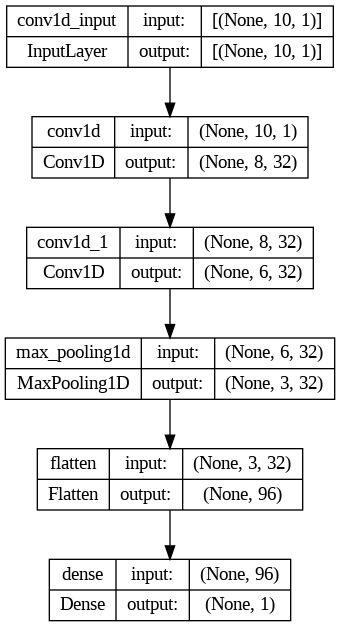

In [5]:
# Визуализация модели
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

1/1 [==============================] - 0s 178ms/step
Прогнозируемые значения:
[array(49.17781, dtype=float32), array(49.288025, dtype=float32), array(49.39062, dtype=float32), array(49.50157, dtype=float32), array(49.616283, dtype=float32), array(49.74376, dtype=float32), array(49.817886, dtype=float32), array(49.878315, dtype=float32), array(49.913628, dtype=float32), array(49.989265, dtype=float32), array(50.060795, dtype=float32), array(50.148617, dtype=float32), array(50.228546, dtype=float32), array(50.30348, dtype=float32), array(50.37255, dtype=float32), array(50.442417, dtype=float32), array(50.514606, dtype=float32), array(50.589523, dtype=float32), array(50.665443, dtype=float32), array(50.7406, dtype=float32)]


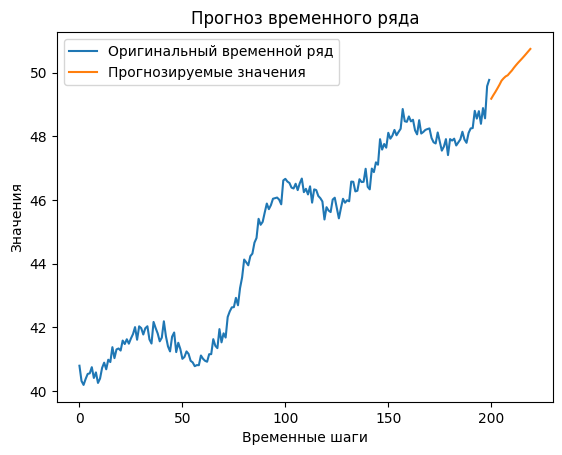

In [6]:
import matplotlib.pyplot as plt

# Загрузка сохраненных весов модели
model.load_weights('model_weights.h5')

# Количество временных шагов для прогнозирования
future_steps = 20

# Подготовка входных данных для прогноза
input_data = test_data[-window_size:]
input_data = input_data.reshape((1, window_size, 1))

# Прогнозирование будущих значений
predictions = []
for _ in range(future_steps):
    prediction = model.predict(input_data)
    prediction = np.squeeze(prediction)
    predictions.append(prediction)
    input_data = np.concatenate((input_data[:, 1:, :], prediction.reshape(1, 1, 1)), axis=1)

# Вывод прогнозируемых значений
print("Прогнозируемые значения:")
print(predictions)

# Построение графика
plt.plot(range(len(test_data)), test_data, label='Оригинальный временной ряд')
plt.plot(range(len(test_data), len(test_data) + future_steps), predictions, label='Прогнозируемые значения')
plt.xlabel('Временные шаги')
plt.ylabel('Значения')
plt.title('Прогноз временного ряда')
plt.legend()
plt.show()


# Линейная регрессия

MAE: 0.20676422632694552
MSE: 0.06941418297823734
MAPE: 0.4595124586797444
RMSE: 0.2634657149957796


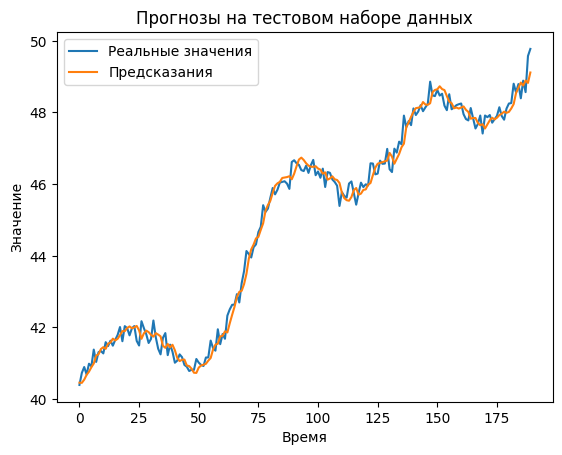

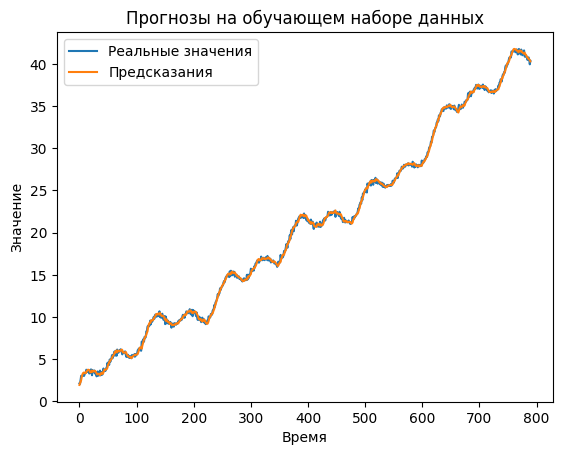

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Загрузка обучающего и тестового датасетов
train_data = np.load('train_data.npy')
test_data = np.load('test_data.npy')

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Решейпинг данных
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred)

# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)

# Вычисление MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Вычисление RMSE
rmse = np.sqrt(mse)

# Вывод результатов
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)
print("RMSE:", rmse)

# Построение графика реальных значений и предсказаний на тестовых данных
plt.plot(y_test, label='Реальные значения')
plt.plot(y_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на тестовом наборе данных')
plt.show()

# Построение графика реальных значений и предсказаний на обучающих данных
y_train_pred = model.predict(X_train)
plt.plot(y_train, label='Реальные значения')
plt.plot(y_train_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на обучающем наборе данных')
plt.show()
